# A SIMPLE MOVIE RECOMMENDER SYSTEM

# Item Based Collaborative Filtering Recommender System

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing the movies data into a dataframe
movies_data = pd.read_csv("movies.csv")
movies_data.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#importing the ratings data into a dataframe
ratings_data = pd.read_csv("ratings.csv")
ratings_data.head(5)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
#renaming the movieId column in movies_data
movies_data = movies_data.rename(columns={'movieId': 'movie_id'})

In [6]:
#renaming some columns in ratings_data
ratings_data = ratings_data.rename(columns={'userId': 'user_id','movieId': 'movie_id'})

In [7]:
movies_data.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings_data.head(5)

,user_id,movie_id,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [9]:
#dropping the genre column in movies_data since it will not be used
movies_data = movies_data.drop("genres", axis=1)
movies_data.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [10]:
#merging the movies data and ratings data using the movies_id column
data = pd.merge(movies_data,ratings_data, on = 'movie_id')

In [11]:
#viewing the first five items in the data
data.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),2,5.0,859046895
1,1,Toy Story (1995),5,4.0,1303501039
2,1,Toy Story (1995),8,5.0,858610933
3,1,Toy Story (1995),11,4.0,850815810
4,1,Toy Story (1995),14,4.0,851766286


In [12]:
#viewing the first five items in the data
data.tail()

,movie_id,title,user_id,rating,timestamp
105334,148238,A Very Murray Christmas (2015),475,3.0,1451213043
105335,148626,The Big Short (2015),458,4.0,1452014749
105336,148626,The Big Short (2015),576,4.5,1451687664
105337,148626,The Big Short (2015),668,4.5,1451148148
105338,149532,Marco Polo: One Hundred Eyes (2015),475,4.0,1451223429


In [13]:
#mathematical description of the data
data.describe()

,movie_id,user_id,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,13381.312477,364.924539,3.516850,1.130424e+09
std,26170.456869,197.486905,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,1073.000000,192.000000,3.000000,9.711008e+08
50%,2497.000000,383.000000,3.500000,1.115154e+09
75%,5991.000000,557.000000,4.000000,1.275496e+09
max,149532.000000,668.000000,5.000000,1.452405e+09


In [14]:
#getting the data type of each column
data.dtypes

movie_id       int64
title         object
user_id        int64
rating       float64
timestamp      int64
dtype: object

In [13]:
#calculating the mean rating of individual movies
data.groupby('title')['rating'].mean().tail()

title
loudQUIETloud: A Film About the Pixies (2006)    4.500000
xXx (2002)                                       2.958333
xXx: State of the Union (2005)                   2.071429
¡Three Amigos! (1986)                            3.012500
À nous la liberté (Freedom for Us) (1931)        3.000000
Name: rating, dtype: float64

In [14]:
#calculate count ratings for all moves
data.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [15]:
#calculating the number of users that have seen each movie
#comparing with the cell above they should be the same thing
data.groupby('title')['user_id'].count().sort_values(ascending = False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: user_id, dtype: int64

In [16]:
#creating a dataframe for the count and mean ratings
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head(10)

,rating,num_of_ratings
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.932432,37
*batteries not included (1987),3.318182,11
...And Justice for All (1979),3.650000,10


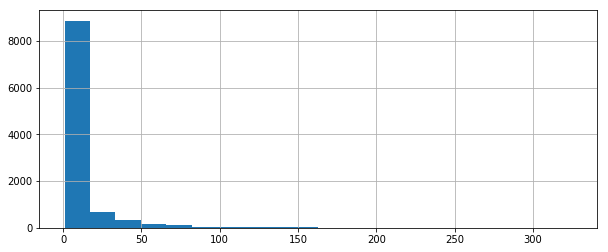

In [17]:
#plotting a histogram of number of ratings
plt.figure(figsize = (10,4))
ratings['num_of_ratings'].hist(bins = 20)


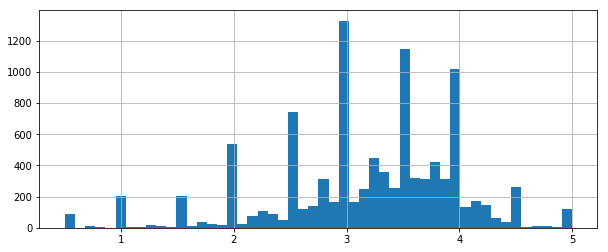

In [18]:
#plotting a graph of ratings
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins = 50)

C:\Users\JADESOLA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


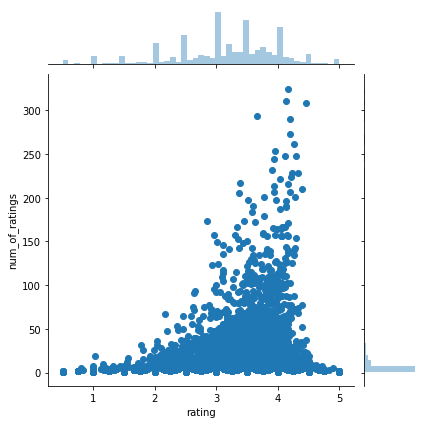

In [19]:
#plotting the relationship between rating of a movie and number of ratings
sns.jointplot(x='rating',y='num_of_ratings',data=ratings)

In [20]:
#converting our data into a matrix showing the ratings each user gave to the movies
moviemat = data.pivot_table(index = 'user_id',columns = 'title', values = 'rating')
moviemat.tail(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#viewing the most rated movies
ratings.sort_values('num_of_ratings', ascending = False).head(10)

,rating,num_of_ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


In [23]:
#assuming a user enjoyed jurassic park and braveheart, we're going to compare the correlation between their ratings and other
#movies in the data, in order to recommend a similar movie to the user
#picking each movie and puting in a series wrt to the user_id and rating
jurassic_user_ratings = moviemat['Jurassic Park (1993)']
braveheart_user_ratings = moviemat['Braveheart (1995)']

In [24]:
#viewing the ratings each user gave the movie
jurassic_user_ratings.head()

user_id
1    3.5
2    NaN
3    4.0
4    NaN
5    3.0
Name: Jurassic Park (1993), dtype: float64

In [25]:
#viewing the ratings each user gave the movie
braveheart_user_ratings.head()

user_id
1    4.0
2    NaN
3    NaN
4    NaN
5    0.5
Name: Braveheart (1995), dtype: float64

In [26]:
#analysing correlation with similar movies
similar_to_jurassic = moviemat.corrwith(jurassic_user_ratings)
similar_to_braveheart = moviemat.corrwith(braveheart_user_ratings)

#similar movies to jurassic world
corr_jurassic = pd.DataFrame(similar_to_jurassic, columns = ['correlation'])
corr_jurassic.dropna(inplace = True)

corr_jurassic.head()

C:\Users\JADESOLA\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\JADESOLA\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",0.635632
(500) Days of Summer (2009),-0.178492
*batteries not included (1987),0.325396
...And Justice for All (1979),-0.182574


In [27]:
#similar movies to the godfather
corr_braveheart = pd.DataFrame(similar_to_braveheart, columns = ['correlation'])
corr_braveheart.dropna(inplace = True)

corr_braveheart.head()

,correlation
title,
"'burbs, The (1989)",0.660184
(500) Days of Summer (2009),-0.012659
*batteries not included (1987),0.058282
...And Justice for All (1979),-0.308957
10 (1979),1.000000


In [28]:
corr_jurassic.sort_values('correlation', ascending = False).head(10)

,correlation
title,
"Castle, The (1997)",1.0
"Bigger, Stronger, Faster* (2008)",1.0
"Holy Mountain, The (Montaña sagrada, La) (1973)",1.0
Arizona Dream (1993),1.0
Speechless (1994),1.0
"Specials, The (2000)",1.0
"I Love You, Beth Cooper (2009)",1.0
I'll Be Home For Christmas (1998),1.0
Sonatine (Sonachine) (1993),1.0


In [29]:
#adding the number of ratings given to each movie to ensure even distribution
corr_jurassic = corr_jurassic.join(ratings['num_of_ratings'])
corr_jurassic.head()

,correlation,num_of_ratings
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",0.635632,20
(500) Days of Summer (2009),-0.178492,37
*batteries not included (1987),0.325396,11
...And Justice for All (1979),-0.182574,10


In [30]:
#using a threshold for the number of ratings to ensure even distribution
corr_jurassic[corr_jurassic['num_of_ratings']>100].sort_values('correlation',ascending = False).head(10)

,correlation,num_of_ratings
title,,
Jurassic Park (1993),1.000000,294
Twister (1996),0.516156,141
Speed (1994),0.493329,197
Back to the Future (1985),0.469993,213
Shrek (2001),0.469194,158
Indiana Jones and the Last Crusade (1989),0.460905,167
Terminator 2: Judgment Day (1991),0.459030,253
Cliffhanger (1993),0.453119,114
"Terminator, The (1984)",0.452682,164


In [31]:
corr_braveheart.sort_values('correlation', ascending = False).head(10)

,correlation
title,
"Bigger, Stronger, Faster* (2008)",1.0
Taxi (2004),1.0
"Decade Under the Influence, A (2003)",1.0
"Long Riders, The (1980)",1.0
Enemy (2013),1.0
Avalanche (1978),1.0
"Bon Cop, Bad Cop (2006)",1.0
The Alphabet Killer (2008),1.0
Loverboy (1989),1.0


In [32]:
#adding the number of ratings given to each movie to ensure even distribution
corr_braveheart = corr_braveheart.join(ratings['num_of_ratings'])
corr_braveheart.head()

,correlation,num_of_ratings
title,,
"'burbs, The (1989)",0.660184,20
(500) Days of Summer (2009),-0.012659,37
*batteries not included (1987),0.058282,11
...And Justice for All (1979),-0.308957,10
10 (1979),1.000000,3


In [33]:
#using a threshold for the number of ratings to ensure even distribution
corr_braveheart[corr_braveheart['num_of_ratings']>70].sort_values('correlation',ascending = False).head(10)

,correlation,num_of_ratings
title,,
Braveheart (1995),1.000000,248
Happy Gilmore (1996),0.594424,79
Meet the Parents (2000),0.539184,71
Wallace & Gromit: The Wrong Trousers (1993),0.475492,77
Jerry Maguire (1996),0.471669,124
"Nutty Professor, The (1996)",0.454330,87
"Abyss, The (1989)",0.450585,91
"Green Mile, The (1999)",0.440321,101
American History X (1998),0.439146,103


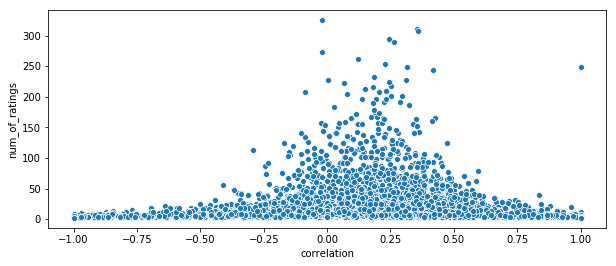

In [34]:
plt.figure(figsize = (10,4))
#sns.barplot(x = corr_godfather["correlation"] ,y = corr_godfather["num of ratings"])
sns.scatterplot(x = "correlation",y = "num_of_ratings",data = corr_braveheart)
#plt.xticks(rotation = 90)

# Nearest Neighbor Item-based Collaborative Filtering

In [37]:
#creating a copy of the data above to work on
data_nn = data.copy()
data_nn.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),2,5.0,859046895
1,1,Toy Story (1995),5,4.0,1303501039
2,1,Toy Story (1995),8,5.0,858610933
3,1,Toy Story (1995),11,4.0,850815810
4,1,Toy Story (1995),14,4.0,851766286


In [39]:
#dropping the timestamp column in data_nn since it will not be used
data_nn = data_nn.drop("timestamp", axis=1)
data_nn.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),2,5.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),8,5.0
3,1,Toy Story (1995),11,4.0
4,1,Toy Story (1995),14,4.0


In [41]:
#checking information on the data
data_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105339 entries, 0 to 105338
Data columns (total 4 columns):
movie_id    105339 non-null int64
title       105339 non-null object
user_id     105339 non-null int64
rating      105339 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.0+ MB


In [47]:
#getting the number of users that rated each movies and creating a dataframe for the count ratings
movie_rating_count = ratings.copy()
movie_rating_count = movie_rating_count.drop("rating", axis = 1)
movie_rating_count.head()

,num_of_ratings
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),1
'Til There Was You (1997),3
"'burbs, The (1989)",20


In [48]:
#merging the movie_rating_count data and the data_nn data using the title
data_rating_count = pd.merge(data_nn,movie_rating_count, on = 'title')
data_rating_count.head()

,movie_id,title,user_id,rating,num_of_ratings
0,1,Toy Story (1995),2,5.0,232
1,1,Toy Story (1995),5,4.0,232
2,1,Toy Story (1995),8,5.0,232
3,1,Toy Story (1995),11,4.0,232
4,1,Toy Story (1995),14,4.0,232


In [49]:
#dropping the null values associated with the title in every row
data_rating_count = data_rating_count.dropna(axis = 0, subset = ['title'])
data_rating_count.head()

,movie_id,title,user_id,rating,num_of_ratings
0,1,Toy Story (1995),2,5.0,232
1,1,Toy Story (1995),5,4.0,232
2,1,Toy Story (1995),8,5.0,232
3,1,Toy Story (1995),11,4.0,232
4,1,Toy Story (1995),14,4.0,232


In [51]:
#getting information on the number of ratings
pd.set_option('display.float_format',lambda x: '%.3f' %x)
data_rating_count['num_of_ratings'].describe()

count   105339.000
mean        61.297
std         65.878
min          1.000
25%         13.000
50%         38.000
75%         87.000
max        325.000
Name: num_of_ratings, dtype: float64

In [52]:
#selecting a threshold for the number a ratings a movie needs tohave to be recommended
threshold = 100
data_rating_count = data_rating_count.query('num_of_ratings >= @threshold')
data_rating_count.head()

,movie_id,title,user_id,rating,num_of_ratings
0,1,Toy Story (1995),2,5.000,232
1,1,Toy Story (1995),5,4.000,232
2,1,Toy Story (1995),8,5.000,232
3,1,Toy Story (1995),11,4.000,232
4,1,Toy Story (1995),14,4.000,232


In [53]:
data_rating_count.shape

(22856, 5)

In [61]:
#creating a pivot map for the movies and users
movie_user_mat = data_rating_count.pivot_table(index = 'title', columns = 'user_id', values = 'rating').fillna(0)
movie_user_mat

user_id,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,3.000
Ace Ventura: Pet Detective (1994),0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,2.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,3.500,0.000
Aladdin (1992),0.000,0.000,3.000,0.000,3.500,0.000,0.000,0.000,0.000,0.000,...,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
Alien (1979),0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,...,0.000,0.000,0.000,5.000,0.000,2.000,0.000,4.000,0.000,4.000
Aliens (1986),0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,4.500,0.000,4.500,2.500
American Beauty (1999),4.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,...,2.500,0.000,0.000,0.000,0.000,0.000,0.000,4.000,4.500,4.000
American History X (1998),0.000,0.000,0.000,0.000,0.000,5.000,5.000,0.000,0.000,0.000,...,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
American Pie (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,2.000


In [56]:
#converting the pivot table generated to an array matrix
from scipy.sparse import csr_matrix
movie_user_matrix = csr_matrix(movie_user_mat.values)

In [58]:
movie_user_matrix

<153x653 sparse matrix of type '<class 'numpy.float64'>'
	with 22856 stored elements in Compressed Sparse Row format>

In [59]:
#using cosine similarity as the metric for determining the similar items

from sklearn.neighbors import NearestNeighbors

model =  NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(movie_user_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [64]:
movie_user_mat.shape

(153, 653)

In [65]:
#selecting a random movie to check similar movies nearest to it
query_index = np.random.choice(movie_user_mat.shape[0])
print(query_index)

90


In [71]:
#getting the distance and index of the movies nearest to the selected movie(query_index)
distances, indices = model.kneighbors(movie_user_mat.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

In [92]:
#printing out all the similar movies and thie distance to the selected movie
for i in range(0, len(distances.flatten())):
    if i == 0 :
        print("Recommendation for {0}: \n".format(movie_user_mat.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i,movie_user_mat.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendation for Matrix, The (1999): 

1: Fight Club (1999), with distance of 0.31332452852433124
2: Lord of the Rings: The Fellowship of the Ring, The (2001), with distance of 0.33757799842196945
3: American Beauty (1999), with distance of 0.3528134272241694
4: Star Wars: Episode V - The Empire Strikes Back (1980), with distance of 0.35965697179461187
5: Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981), with distance of 0.3649367583974146
